In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import odeint
import cmath

In [ ]:
#Funciones del problema que quiero comparar
def exponencial(tiempo, lambdas):
    result = np.exp(tiempo * lambdas)
    return result

def f(t, y):
    return lambdas * y

def euler(f, t0, y0, tf, h):
    n = int((tf - t0) / h) + 1
    v_sol = np.zeros(n)
    v_sol[0] = y0
    tiempo = np.linspace(t0, tf, n)
    for i in range(1, n):
        v_sol[i] = v_sol[i - 1] + h * f(tiempo[i - 1], v_sol[i - 1])
    return v_sol, tiempo

def euler_mejorado(f, t0, tf, X0, h):
    tiempo = np.arange(t0, tfinal, h)
    X = [X0]
    for t in tiempo:
      X.append(X[-1] + h*f(t[-1], X[-1]))
    return tiempo, X[:-1]

def runge_kutta(f, t0, tf, y0, h):
    n = int((tf - t0) / h) + 1
    v2_sol = np.zeros(n)
    v2_sol[0] = y0
    tiempo = np.linspace(t0, tf, n)
    for i in range(1, n):
        k1 = h * f(tiempo[i - 1], v2_sol[i - 1])
        k2 = h * f(tiempo[i - 1] + h, v2_sol[i - 1] + k1)
        v2_sol[i] = v2_sol[i - 1] + 0.5 * (k1 + k2)
    return v2_sol, tiempo


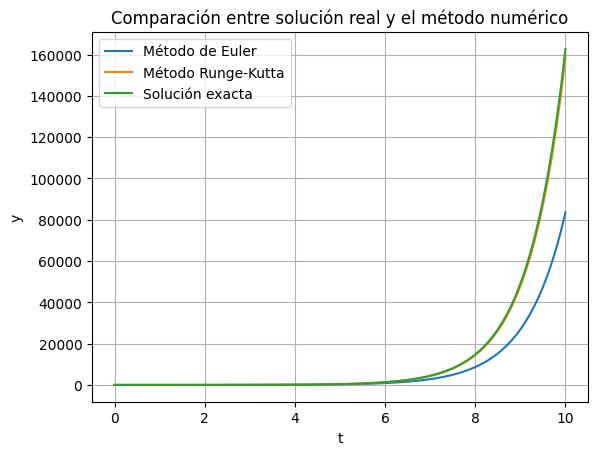

In [ ]:
#Planteo los parámetros del problema
lambdas = 1.2
t0 = 0
tf = 10
y0 = 1
h = 0.1
solucion_euler, t = euler(f, t0, y0, tf, h)
solucion_rk, t = runge_kutta(f, t0, tf, y0, h)
exponencial = exponencial(t, lambdas)

plt.plot(t, solucion_euler, label='Método de Euler')
plt.plot(t, solucion_rk, label = "Método Runge-Kutta")
plt.plot(t, exponencial, label='Solución exacta')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Comparación entre solución real y el método numérico')
plt.legend()
plt.grid(True)
plt.show()

Podemos observar que Runge-Kutta de orden 2 se aproxima mucho mejor que Euler a la exponencial.

In [ ]:
def f1(t,y,u):
  return u

def f2(t,y,u):
  return -y

def euler_b(f1, f2, t0, y0, u0, tf, h):
    n = int((tf - t0) / h) + 1
    vector_y = np.zeros(n)
    vector_y[0] = y0
    vector_u = np.zeros(n)
    vector_u[0] = u0
    tiempo = np.linspace(t0, tf, n)

    for i in range(1, n):
        vector_y[i] = vector_y[i - 1] + h * f1(tiempo[i - 1], vector_y[i - 1], vector_u[i-1])
        vector_u[i] = vector_u[i - 1] + h * f2(tiempo[i - 1], vector_y[i - 1], vector_u[i-1])

    return vector_y, vector_u, tiempo

In [ ]:
t0 = 0
y0 = 1
u0 = 1
tf = 20
h = 0.06

y_res, u_res, t_res = euler_b(f1, f2, t0, y0, u0, tf, h)

In [ ]:
energia = []
for i in range(len(y_res)):
  energia.append(0.5*u_res[i]**2 + 0.5*y_res[i]**2)

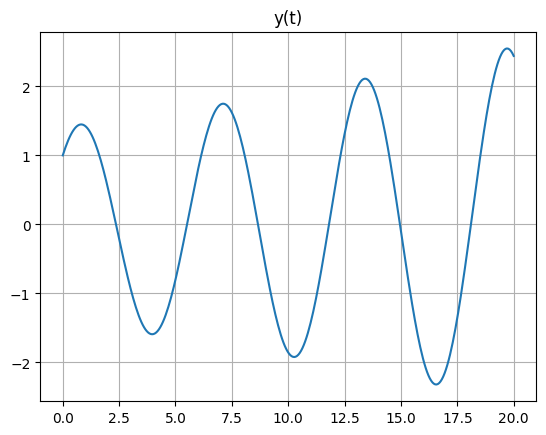

In [ ]:
plt.plot(t_res, y_res)
plt.title('y(t)')
plt.grid(True)
plt.show()

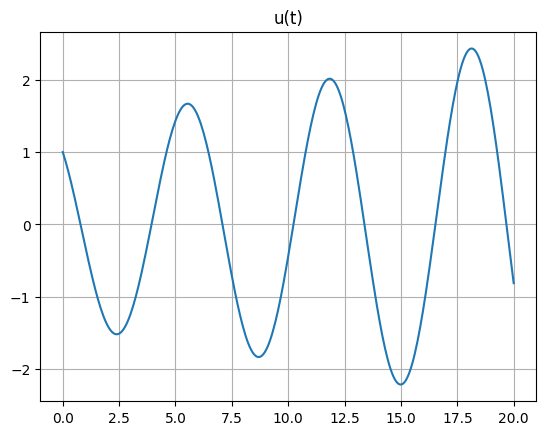

In [ ]:
plt.plot(t_res, u_res)
plt.title('u(t)')
plt.grid(True)
plt.show()

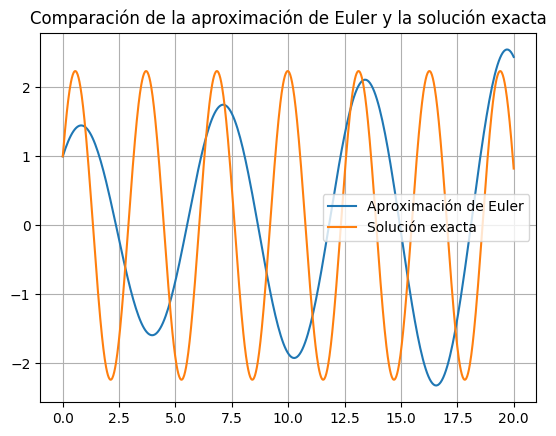

In [ ]:
# Definición de la función original (solución exacta)
def solucion_exacta(t):
    return np.cos(2*t) + 2*np.sin(2*t)

# Cálculo de la solución exacta
t_exact = np.linspace(t0, tf, 1000)
y_exact = solucion_exacta(t_exact)

# Gráficos
plt.plot(t_res, y_res, label='Aproximación de Euler')
plt.plot(t_exact, y_exact, label='Solución exacta')
plt.title('Comparación de la aproximación de Euler y la solución exacta')
plt.legend()
plt.grid(True)
plt.show()